# Context
Take all of the spine files and find the latest status

## Libraries

In [1]:
import pandas as pd
import glob
from datetime import datetime

## Bring in All Files

In [2]:
# Folder where CSVs are saved
path = '/Users/robpacey/Projects/2. Horse Racing/1. Betting Webscrape - Sportinglife/SportingLife/1. RaceList/'

# Pattern to match all RaceURLs CSVs
csv_files = glob.glob(f"{path}/*_RaceURLs.csv")

all_dfs = []

for file in csv_files:
    # Extract the "file_date" from filename (assumes first part of filename is YYYYMMDD)
    filename = file.split("/")[-1]  # get filename only
    file_date_str = filename.split("_")[0]
    file_date = datetime.strptime(file_date_str, "%Y%m%d")
    
    df = pd.read_csv(file)
    df['file_date'] = file_date  # add column to track which file it came from
    all_dfs.append(df)

# Concatenate all CSVs
combined_df = pd.concat(all_dfs, ignore_index=True)

## Save Latest Status - One List

In [3]:
# Keep only the latest record for each race (based on prerace_URL)
latest_df = combined_df.sort_values("file_date").groupby("prerace_URL").tail(1)

# Drop the helper 'file_date' column if not needed
latest_df = latest_df.drop(columns=['file_date'])

In [4]:
# Get today's date as YYYY-MM-DD
today_str = datetime.today().strftime("%Y%m%d")

# Generate the filenames based on start_date and end_date
path = f'/Users/robpacey/Projects/2. Horse Racing/1. Betting Webscrape - Sportinglife/SportingLife/2. Latest RaceList/'
filename = path + f'/{today_str}_RaceLists.csv'

# Save DataFrames to CSV files
latest_df.to_csv(filename, index=False)

## Check Coverage

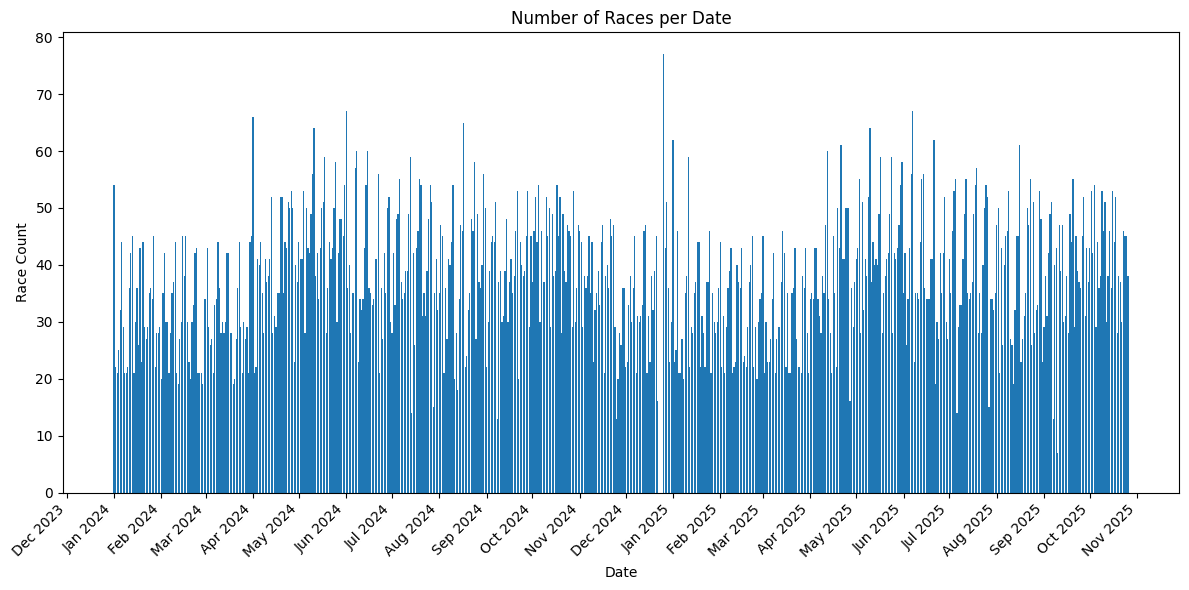

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure Date column is datetime
latest_df["Date"] = pd.to_datetime(latest_df["Date"])

# Group and plot
race_counts = latest_df.groupby("Date").size().reset_index(name="RaceCount")

plt.figure(figsize=(12,6))
plt.bar(race_counts["Date"], race_counts["RaceCount"])

# Format x-axis to show one label per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.title("Number of Races per Date")
plt.xlabel("Date")
plt.ylabel("Race Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()